# US_Accidents_Exploratory_Data_Analysis

### Steps to follow
- Select a large real_world (more then 2.5M Records) dataset from kaggle
- Perform data preparation & cleaning using Pandas & Numpy
- Perform exploratory analysis & visualization using Matplotlib & Seaborn
- Ask & answer questions about the data in a jupyter notebook
- Summarize your inferences & write a conclusion


## Questions to ask from this dataset
- 1) Which 5 states have the highest number of accidents?
- 2) Top 100 cities in number of accidents
- 3) What time of the day are accidents most frequent in ?
- 4) Which days of the week have the most accidents ?
- 5) Which months have the most accidents?
- 6) What is the trend of accidents year over year (decreasing/increasing) ?

### Data Preparation and Cleaning

- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

###  Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\EDA\US_Accidents_Dec21_updated.csv")

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.shape

(2845342, 47)

In [5]:
len(df.columns)

47

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [8]:
# How many numeric columns in the dataset

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


14

## Find the missing values

In [9]:
df.isna().sum().sort_values(ascending = False)[:10]

Number               1743911
Precipitation(in)     549458
Wind_Chill(F)         469643
Wind_Speed(mph)       157944
Wind_Direction         73775
Humidity(%)            73092
Weather_Condition      70636
Visibility(mi)         70546
Temperature(F)         69274
Pressure(in)           59200
dtype: int64

### Percentage of missing values per columns

In [10]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage[:10]

Number               0.612900
Precipitation(in)    0.193108
Wind_Chill(F)        0.165057
Wind_Speed(mph)      0.055510
Wind_Direction       0.025928
Humidity(%)          0.025688
Weather_Condition    0.024825
Visibility(mi)       0.024794
Temperature(F)       0.024346
Pressure(in)         0.020806
dtype: float64

In [11]:
# Shows only those columns which has missing values

missing_percentage[missing_percentage !=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

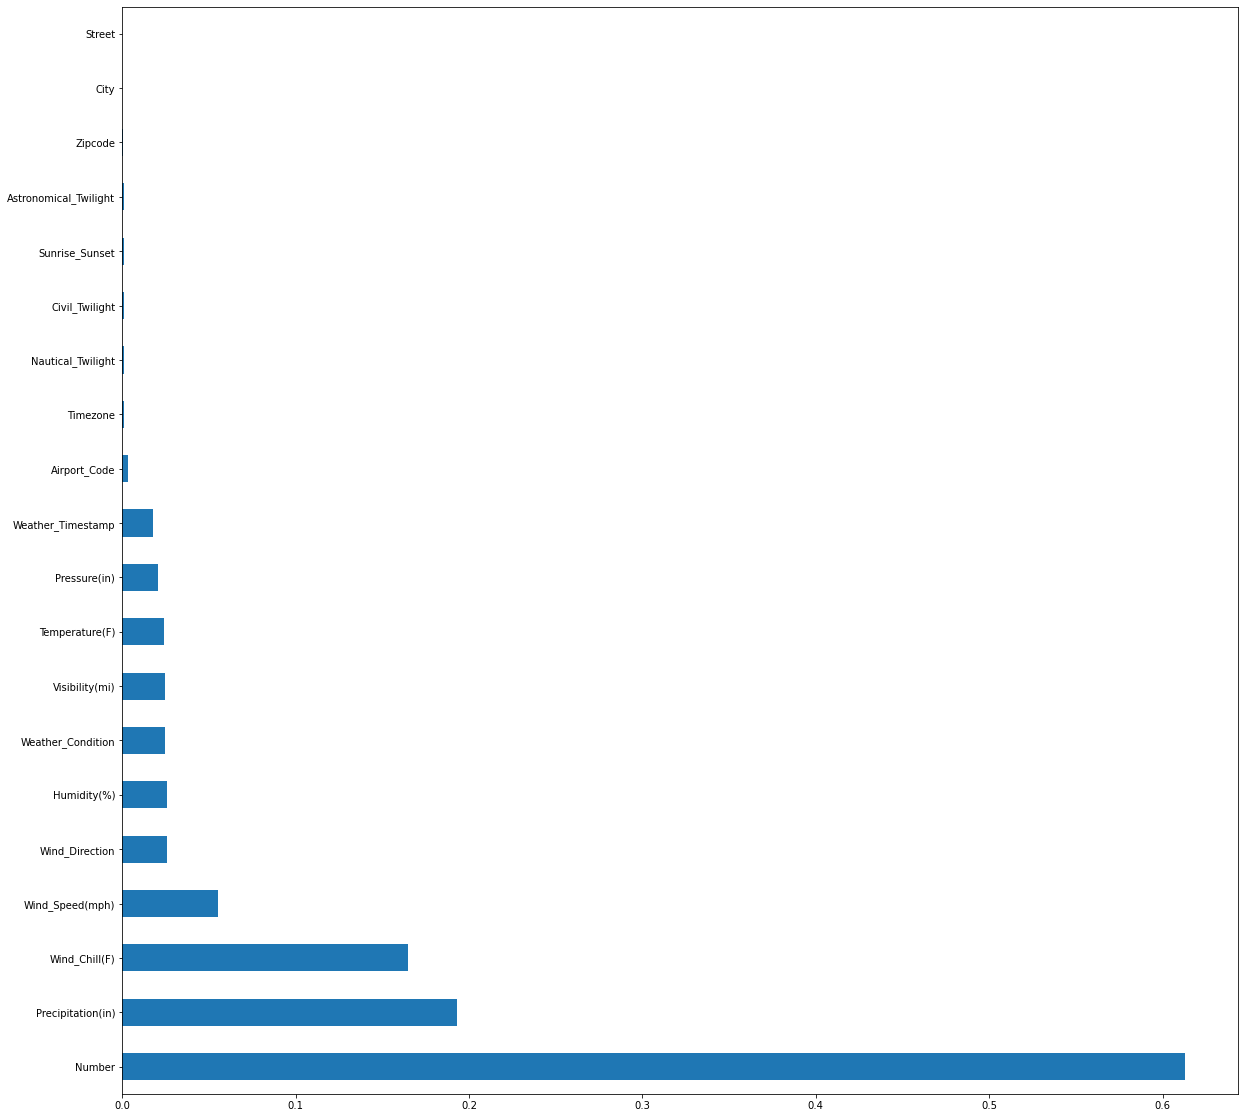

In [12]:
missing_percentage[missing_percentage !=0].plot(kind = 'barh', figsize =(20,20))

### Columns we will analyse
1. City
2. Start_Time
3. Start_Lat, Start_Lng
4. Temperature
5. Weather_Condition

In [13]:
cities = df.City.unique()
len(cities)

11682

## Answer of Questions

### 1) Which 5 states have the highest number of accidents?

In [14]:
states_by_accident = df['State'].value_counts()[:10]

<AxesSubplot:>

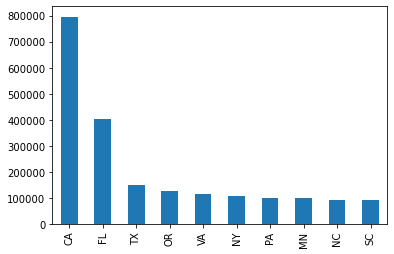

In [15]:
states_by_accident.plot(kind = 'bar')

- Observation
#### 5 States having the highest number of accidents are

In [16]:
df['State'].value_counts()[:5]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

###  2) Top 100 cities in number of accidents

In [17]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

### 3) What time of the day are accidents most frequent in ?

In [18]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [19]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [20]:
# convert Datetime to hour

pd.DatetimeIndex(df['Start_Time']).hour

Int64Index([ 0,  5,  6,  6,  7,  8,  8, 11, 14, 15,
            ...
            17, 17, 17, 17, 18, 18, 19, 19, 19, 18],
           dtype='int64', name='Start_Time', length=2845342)

C:\Users\SAHILJOSAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

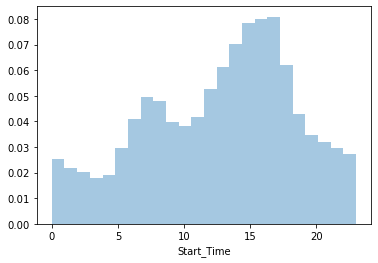

In [21]:
# Plot Histogram

sns.distplot(pd.DatetimeIndex(df['Start_Time']).hour, bins = 24, kde = False, norm_hist= True)

## At which time of the day highest accidents occur

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

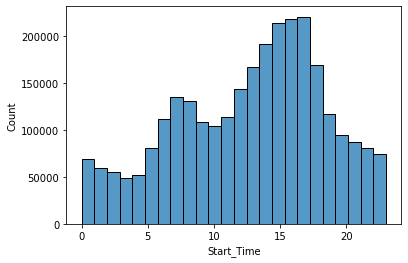

In [22]:
sns.histplot(data = df, x = pd.DatetimeIndex(df['Start_Time']).hour, bins = 24)

- Observation
###  A high number of the accidents occur between 3 pm to 5 pm 

## Is the distribution of accidents by hour the same on weekends as on weekdays?

C:\Users\SAHILJOSAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

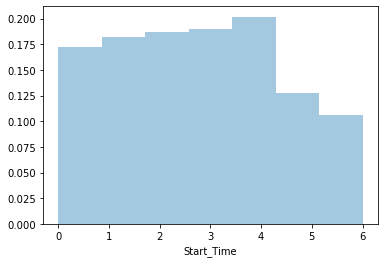

In [23]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist= True)

- Observation
### From the graph it is seen that on weekdays more number of accidents occur compare to weekends

###  Over 1110 cities have reported just 1 accident (need to investigate)

In [24]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

## 4) Which days of the week have the most accidents ?

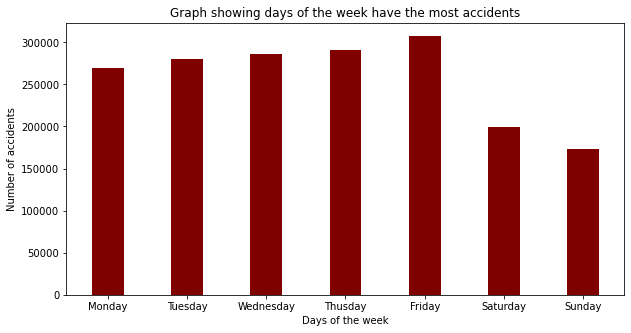

In [28]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(days,list_days_of_the_week, color ='maroon',width = 0.4)
 
plt.xlabel("Days of the week")
plt.ylabel("Number of accidents")
plt.title("Graph showing days of the week have the most accidents")
plt.show()

- Observation
### Maximum number of accidents occurs on Fridays 

In [26]:
list_days_of_the_week = []
for i in range(0,7):
    list_days_of_the_week.append(len(df.Start_Time[df.Start_Time.dt.dayofweek == (i)].unique()))
list_days_of_the_week

[268929, 280241, 286551, 291495, 307609, 198976, 173510]

In [27]:
days = ["Monday","Tuesday","Wednesday","Thusday","Friday","Saturday","Sunday"]
days

['Monday', 'Tuesday', 'Wednesday', 'Thusday', 'Friday', 'Saturday', 'Sunday']

## 5) Which months have the most accidents?

<AxesSubplot:>

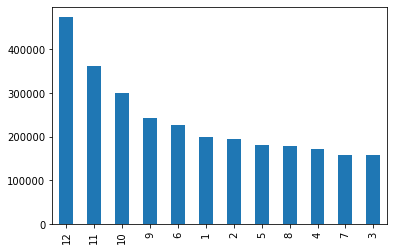

In [29]:
df.Start_Time.dt.month.value_counts().plot(kind = "bar")

### 6) What is the trend of accidents year over year (decreasing/increasing) ?

<AxesSubplot:>

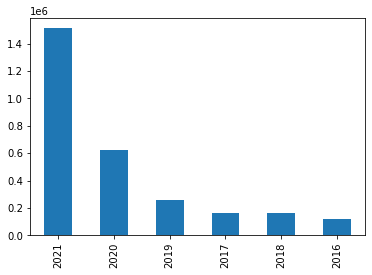

In [30]:
trend_of_accident = df.Start_Time.dt.year.value_counts()
trend_of_accident.plot(kind= "bar")

In [31]:
df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

## Accidents occur in the year 2019

C:\Users\SAHILJOSAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

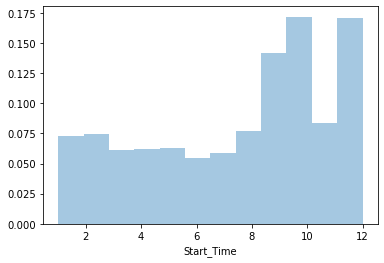

In [32]:
# Data of 2019

df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

## Accidents occur in the year 2018

<AxesSubplot:xlabel='Start_Time'>

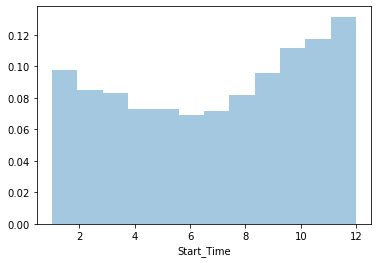

In [33]:
# Data of 2018

df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

## Accidents occur in the year 2016

<AxesSubplot:xlabel='Start_Time'>

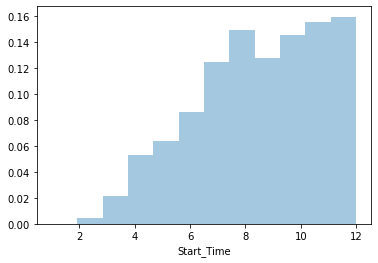

In [34]:
# Data of 2016

df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

- Observation
### Much Data is missing for 2016. Maybe even 2017

### High Accident Cities and low accident cities

In [35]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [36]:
len(high_accident_cities)

496

<AxesSubplot:xlabel='City', ylabel='Density'>

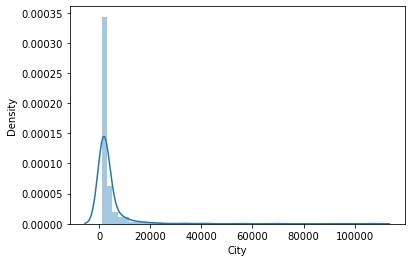

In [37]:
sns.distplot(high_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

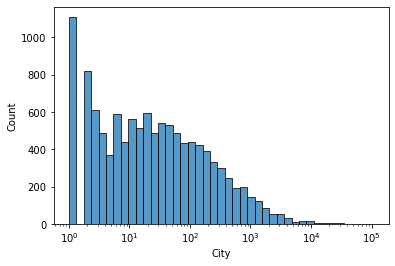

In [38]:
sns.histplot(cities_by_accident, log_scale = True)

## Analysis basis on Start Latitude & Longitude

In [39]:
df.Start_Lat[:5]

0    40.108910
1    39.865420
2    39.102660
3    41.062130
4    39.172393
Name: Start_Lat, dtype: float64

In [40]:
df.Start_Lng[:5]

0   -83.092860
1   -84.062800
2   -84.524680
3   -81.537840
4   -84.492792
Name: Start_Lng, dtype: float64